# EDA 
Responsable: Juan Alejandro Gómez Jaramillo

Repositorio: https://github.com/agomezj4/proyecto_segmentacion

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir('/Users/agomezj/Desktop/Data Science/Proyectos/proyecto_segmentacion/src')
print(os.getcwd())

/Users/agomezj/Desktop/Data Science/Proyectos/proyecto_segmentacion/src


In [15]:
data = pd.read_parquet('../data/04_feature/feature_data.parquet')

#### Hora y Visita de Dispositivos

1. Patrón de Comportamiento por Hora de Visita: Identificar el intervalo de tiempo con la mayor tasa de interacciones por página y el menor rebote.

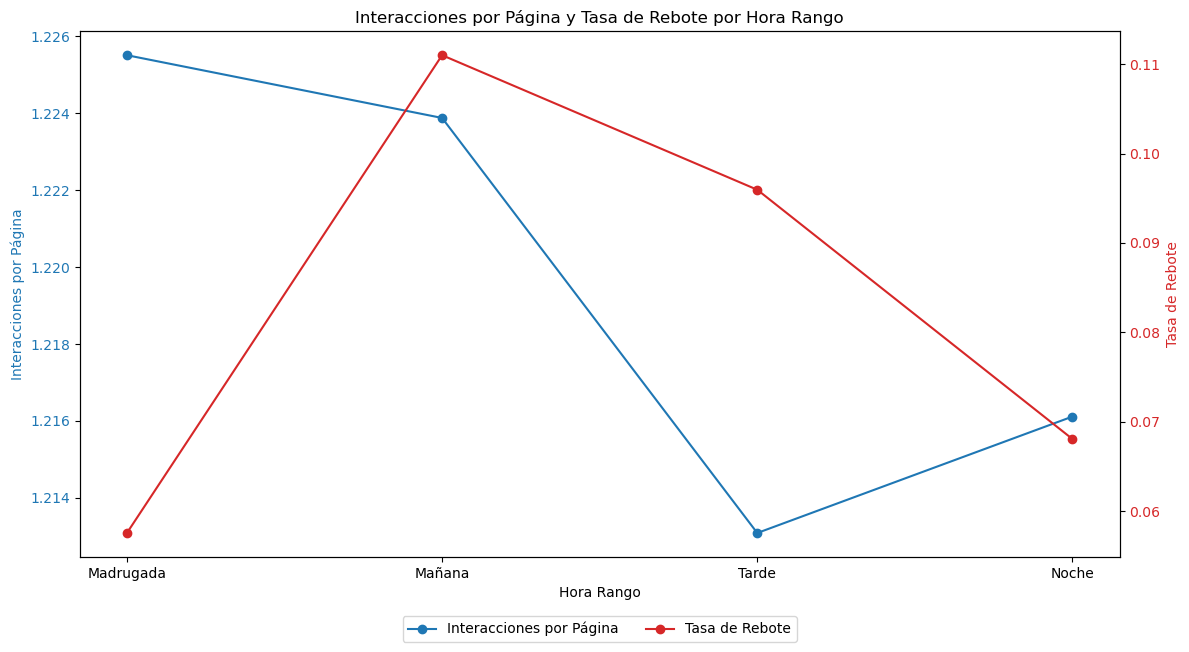

In [33]:
grouped_data = data.groupby('hora_rango', observed=True).agg({
    'interacciones_por_pagina': 'mean',
    'tasa_rebote': 'mean'
}).reset_index()

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Hora Rango')
ax1.set_ylabel('Interacciones por Página', color='tab:blue')
ax1.plot(grouped_data['hora_rango'], grouped_data['interacciones_por_pagina'], color='tab:blue', marker='o', label='Interacciones por Página')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Tasa de Rebote', color='tab:red')
ax2.plot(grouped_data['hora_rango'], grouped_data['tasa_rebote'], color='tab:red', marker='o', label='Tasa de Rebote')
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.tight_layout()
plt.title('Interacciones por Página y Tasa de Rebote por Hora Rango')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)

plt.show()

2. Dispositivos y Sistemas Operativos: Destacar el dispositivo y sistema operativo con el mejor rendimiento en términos de interacción y tasa de rebote.

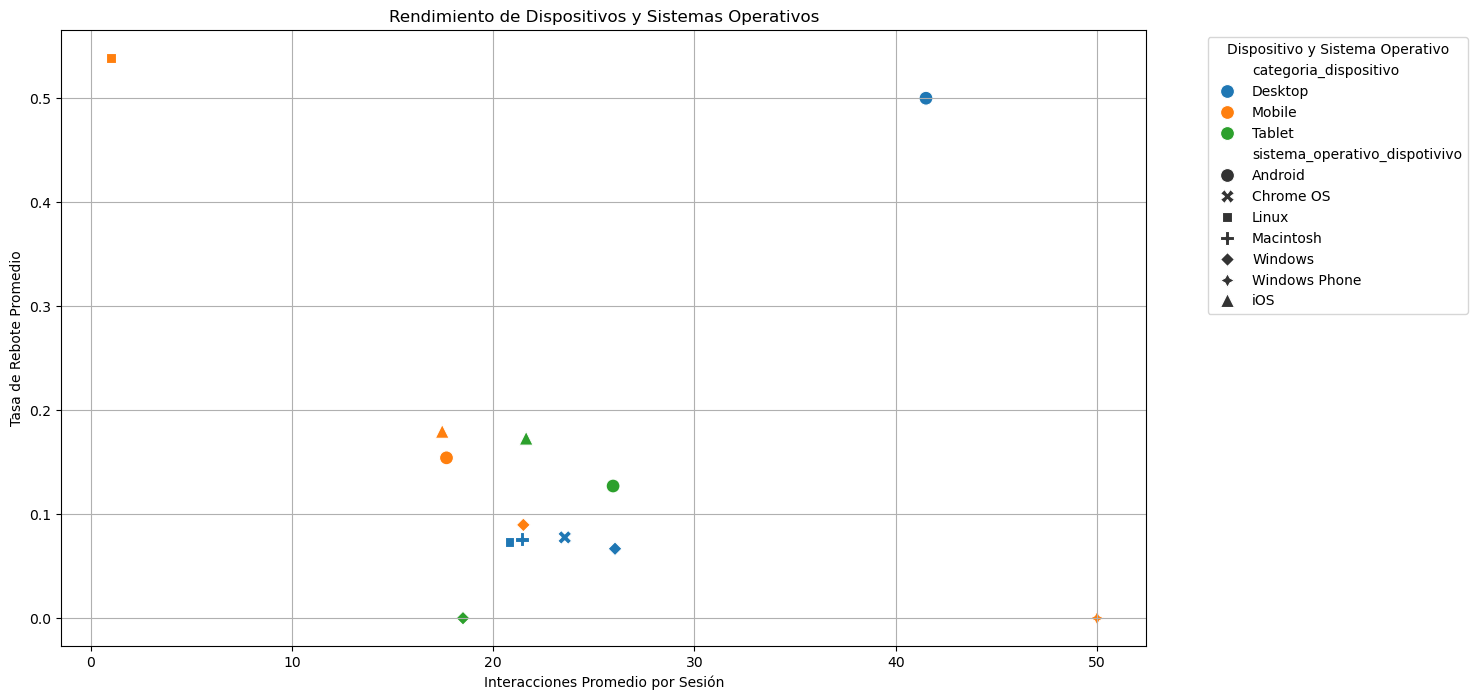

In [43]:
agg_data = data.groupby(['categoria_dispositivo', 'sistema_operativo_dispotivivo']).agg({
    'interacciones_sesion': 'mean',
    'tasa_rebote': 'mean'
}).reset_index()

plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=agg_data, 
    x='interacciones_sesion', 
    y='tasa_rebote', 
    hue='categoria_dispositivo', 
    style='sistema_operativo_dispotivivo', 
    s=100
)
plt.title('Rendimiento de Dispositivos y Sistemas Operativos')
plt.xlabel('Interacciones Promedio por Sesión')
plt.ylabel('Tasa de Rebote Promedio')
plt.legend(title='Dispositivo y Sistema Operativo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

#### Canales y Medios de Tráfico y Frecuencia de Visitas

3. Canal y Medio de Tráfico: Identificar el canal y medio de tráfico que genera las mejores métricas de interacción y tasa de rebote.

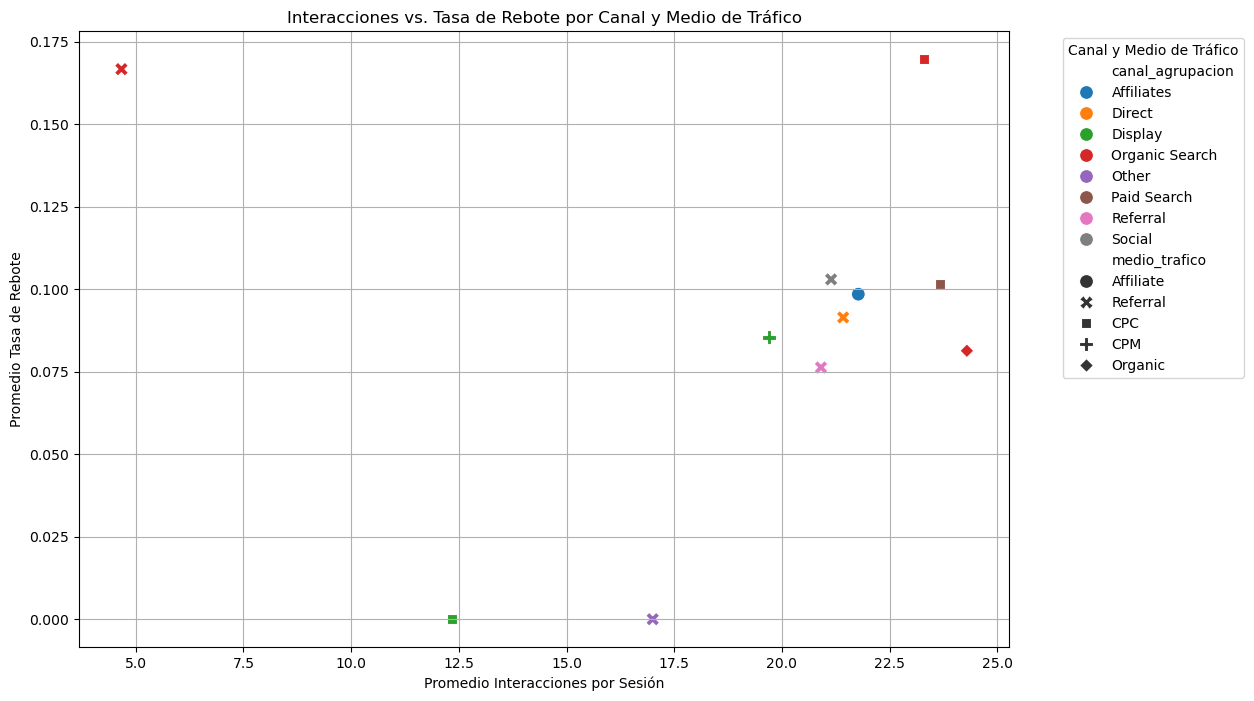

In [51]:
summary = data.groupby(['canal_agrupacion', 'medio_trafico']).agg({
    'interacciones_sesion': 'mean',
    'tasa_rebote': 'mean'
}).reset_index()

plt.figure(figsize=(12, 8))
ax = sns.scatterplot(data=summary, x='interacciones_sesion', y='tasa_rebote', hue='canal_agrupacion', style='medio_trafico', s=100)
plt.title('Interacciones vs. Tasa de Rebote por Canal y Medio de Tráfico')
plt.xlabel('Promedio Interacciones por Sesión')
plt.ylabel('Promedio Tasa de Rebote')
plt.legend(title='Canal y Medio de Tráfico', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.show()

4. Frecuencia de Visitas y Comportamiento en Fines de Semana: Resaltar cómo la frecuencia de visitas y las visitas en fines de semana afectan el comportamiento del usuario.

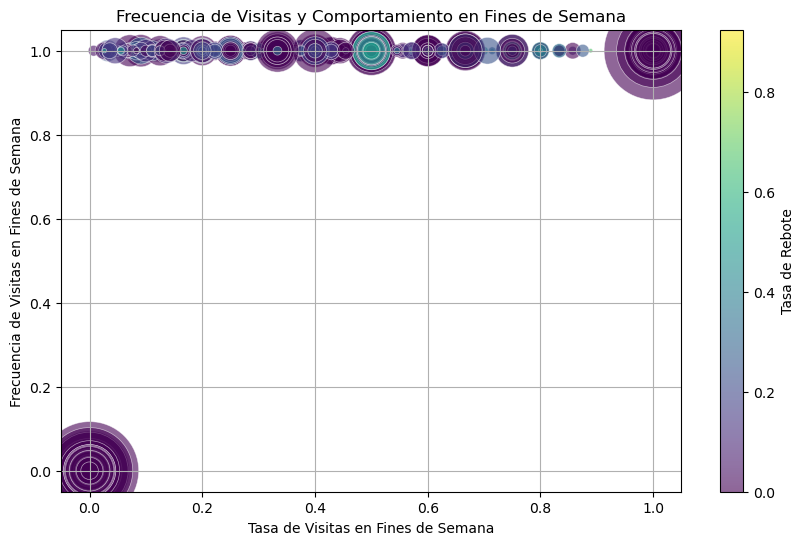

In [53]:
x = data['tasa_visitas_fds']
y = data['clt_visita_fds']
size = data['interacciones_sesion'] * 10  #
color = data['tasa_rebote']

plt.figure(figsize=(10, 6))
scatter = plt.scatter(x, y, s=size, c=color, cmap='viridis', alpha=0.6, edgecolors='w', linewidth=0.5)
plt.colorbar(scatter, label='Tasa de Rebote')
plt.xlabel('Tasa de Visitas en Fines de Semana')
plt.ylabel('Frecuencia de Visitas en Fines de Semana')
plt.title('Frecuencia de Visitas y Comportamiento en Fines de Semana')
plt.grid(True)
plt.show()